### Using a TRILEGAL file for a given healpix, 
### produce maps with Mr - [Fe/H] priors 

In [1]:
%matplotlib inline
import sys
from astropy.table import Table
from astropy.coordinates import SkyCoord
from astropy import units as u
from astropy.table import hstack
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
from scipy import stats
from scipy import optimize
from scipy import interpolate 
from scipy.interpolate import griddata
from scipy.stats import gaussian_kde

In [2]:
df = pd.read_csv("/mnt/beegfs/scratch/lovro/temp/hipscat_dump_one_healpix_o8_h532725.csv")
df.rename(columns={"gall": "glon", "galb": "glat", "gc": "comp", "m_h": "FeH", "av": "Av",
                   "mu0": "DM"}, inplace=True)
df.to_csv("/mnt/beegfs/scratch/lovro/temp/hipscat_dump_one_healpix_o8_h532725.csv")

In [3]:
Table.from_pandas(df).write("/mnt/beegfs/scratch/lovro/temp/hipscat_dump_one_healpix_o8_h532725.dat", format='ascii', overwrite=True)

In [7]:
## automatically reload any modules read below that might have changed (e.g. plots)
%reload_ext autoreload
%autoreload 2
# importing plotting and locus tools: 
sys.path.append('../src')
import LocusTools as lt
import BayesTools as bt
import PlotTools as pt
import pandas as pd

In [5]:
%%time
## TRILEGAL sims: read data file (such as Dani's three_pix_triout.dat)
trilegal = pd.read_csv("/mnt/beegfs/scratch/lovro/temp/hipscat_dump_one_healpix_o8_h532725.csv")
trilegal = lt.readTRILEGALLSDB(trilegal)
# absolute intrinsic r band magnitude
# trilegal = trilegal.to_pandas()
trilegal['Mr'] = trilegal['rmag'] - trilegal['Ar'] - trilegal['DM']  
# NB TRILEGAL sample is defined by r<27.5

CPU times: user 2.16 s, sys: 333 ms, total: 2.49 s
Wall time: 2.82 s


sample <class 'pandas.core.frame.DataFrame'>
Healpix:  -0.0 
---------------------------------------
tS <class 'pandas.core.frame.DataFrame'>
r= 13.5 to 14.5 N= 1355720 Ns= 2
ERROR: no data to make map (see dumpPriorMaps)
tS <class 'pandas.core.frame.DataFrame'>
r= 14.0 to 15.0 N= 1355720 Ns= 14


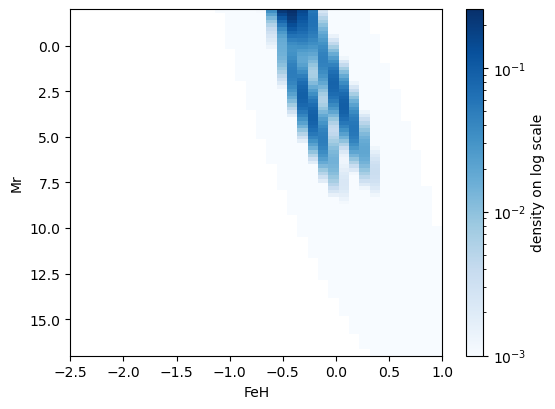

tS <class 'pandas.core.frame.DataFrame'>
r= 14.5 to 15.5 N= 1355720 Ns= 26


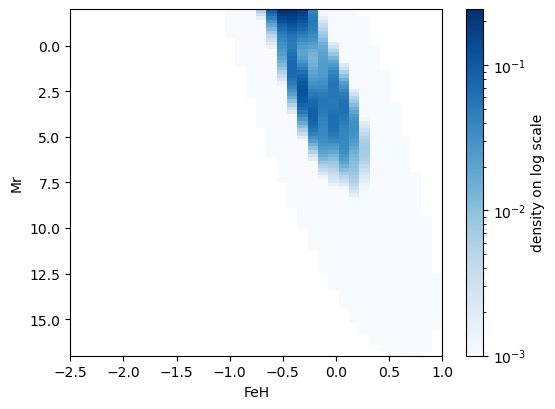

tS <class 'pandas.core.frame.DataFrame'>
r= 15.0 to 16.0 N= 1355720 Ns= 59


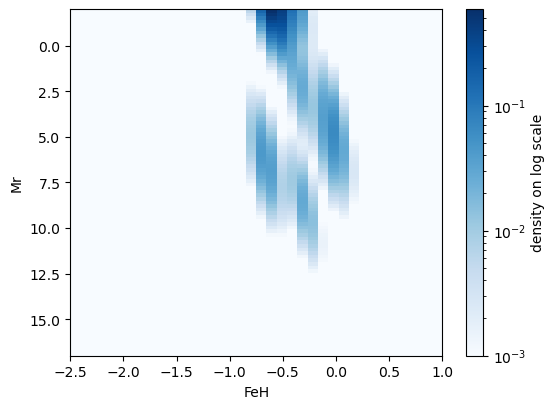

tS <class 'pandas.core.frame.DataFrame'>
r= 15.5 to 16.5 N= 1355720 Ns= 238


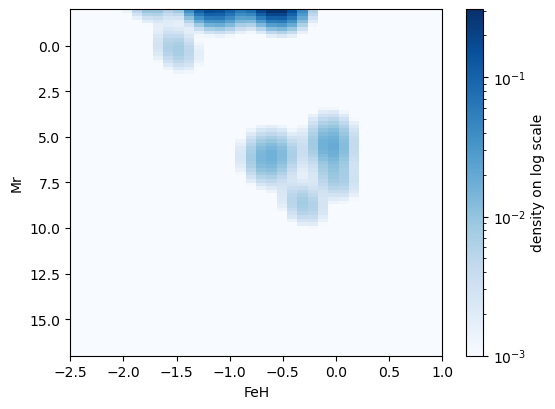

tS <class 'pandas.core.frame.DataFrame'>
r= 16.0 to 17.0 N= 1355720 Ns= 543


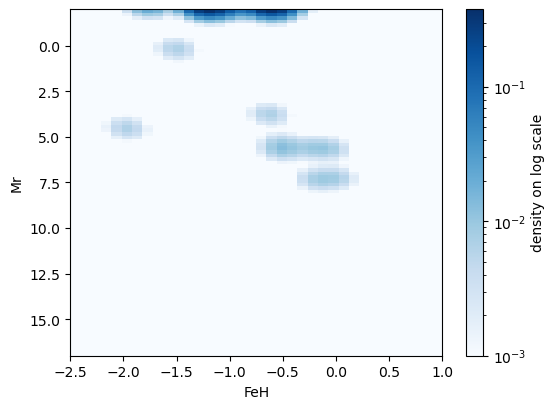

tS <class 'pandas.core.frame.DataFrame'>
r= 16.5 to 17.5 N= 1355720 Ns= 827


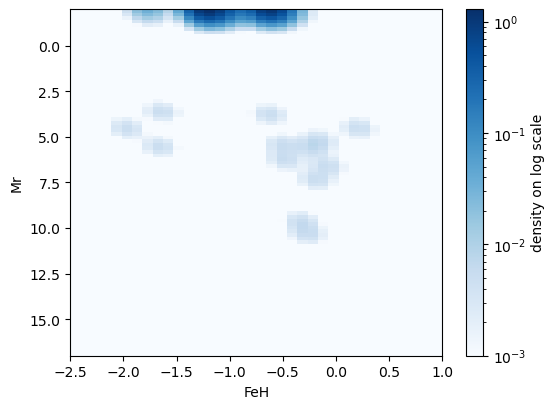

tS <class 'pandas.core.frame.DataFrame'>
r= 17.0 to 18.0 N= 1355720 Ns= 1142


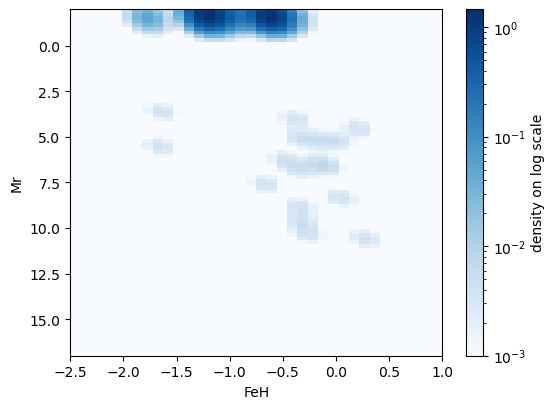

tS <class 'pandas.core.frame.DataFrame'>
r= 17.5 to 18.5 N= 1355720 Ns= 1851


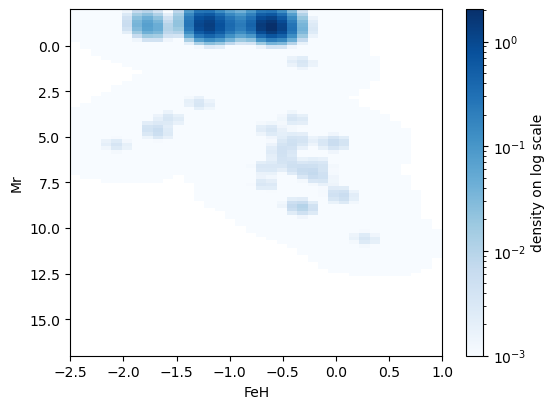

tS <class 'pandas.core.frame.DataFrame'>
r= 18.0 to 19.0 N= 1355720 Ns= 3160


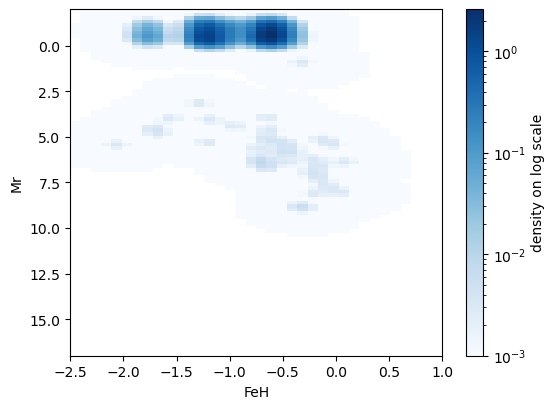

tS <class 'pandas.core.frame.DataFrame'>
r= 18.5 to 19.5 N= 1355720 Ns= 9118


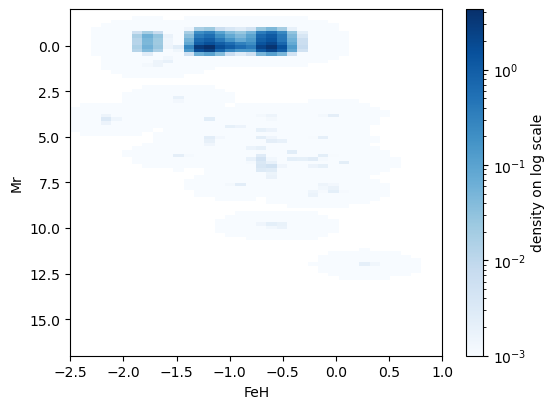

tS <class 'pandas.core.frame.DataFrame'>
r= 19.0 to 20.0 N= 1355720 Ns= 12389


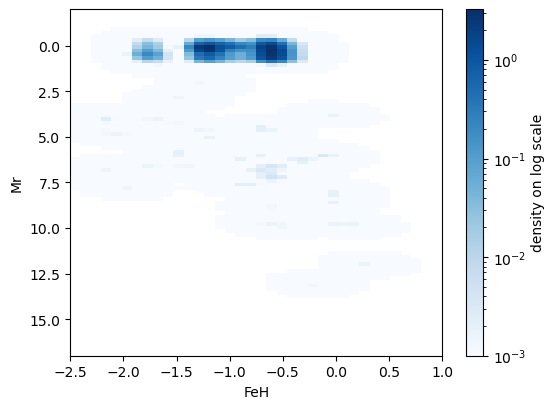

tS <class 'pandas.core.frame.DataFrame'>
r= 19.5 to 20.5 N= 1355720 Ns= 10779


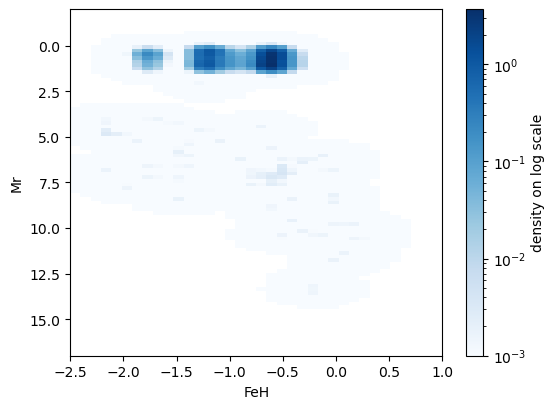

tS <class 'pandas.core.frame.DataFrame'>
r= 20.0 to 21.0 N= 1355720 Ns= 15319


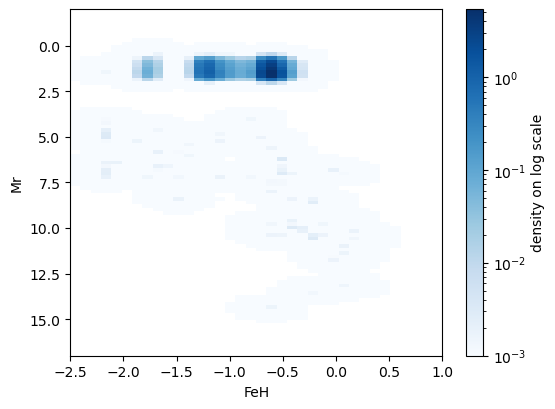

tS <class 'pandas.core.frame.DataFrame'>
r= 20.5 to 21.5 N= 1355720 Ns= 26879


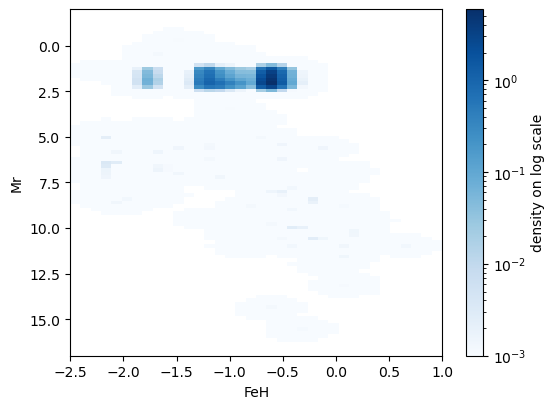

tS <class 'pandas.core.frame.DataFrame'>
r= 21.0 to 22.0 N= 1355720 Ns= 46924


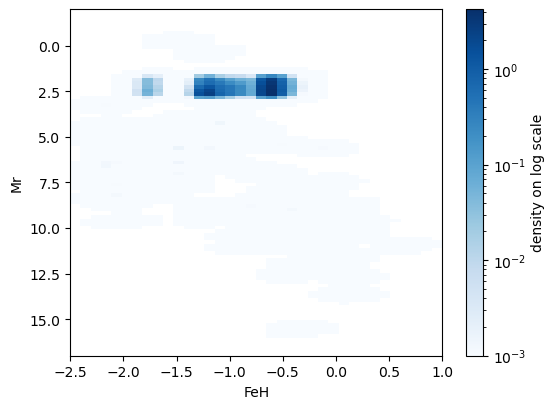

tS <class 'pandas.core.frame.DataFrame'>
r= 21.5 to 22.5 N= 1355720 Ns= 72673


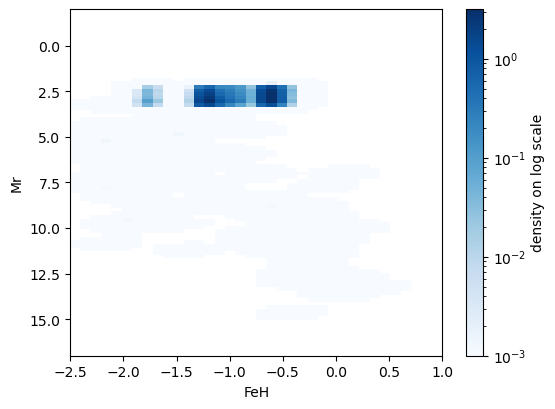

tS <class 'pandas.core.frame.DataFrame'>
r= 22.0 to 23.0 N= 1355720 Ns= 100609


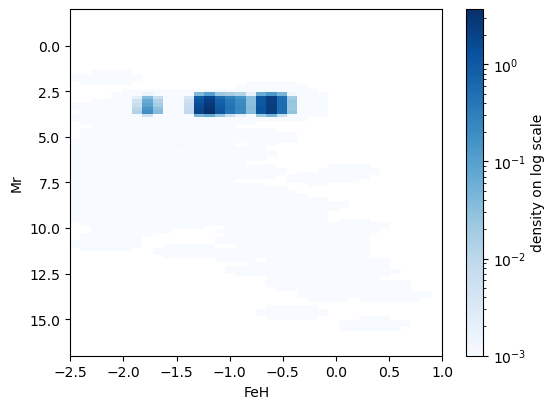

tS <class 'pandas.core.frame.DataFrame'>
r= 22.5 to 23.5 N= 1355720 Ns= 130065


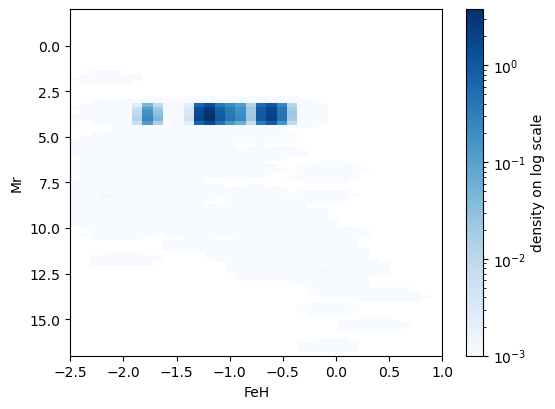

tS <class 'pandas.core.frame.DataFrame'>
r= 23.0 to 24.0 N= 1355720 Ns= 160761


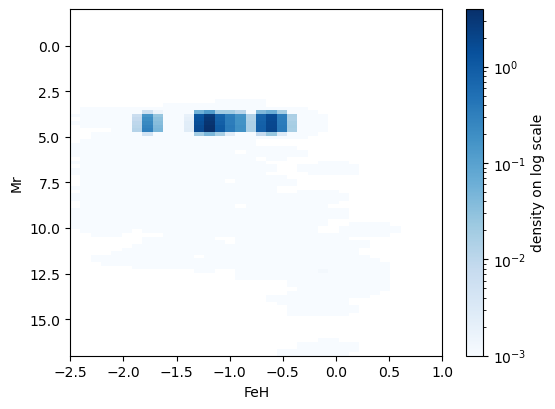

tS <class 'pandas.core.frame.DataFrame'>
r= 23.5 to 24.5 N= 1355720 Ns= 195726


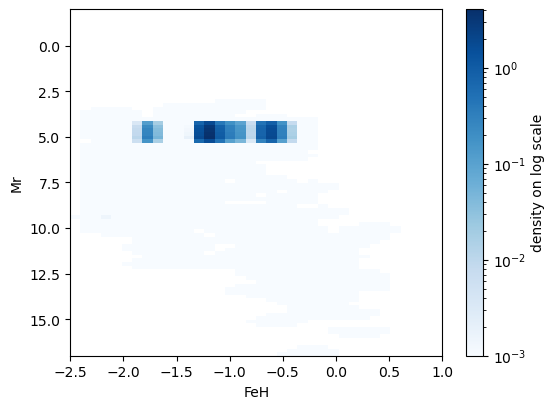

tS <class 'pandas.core.frame.DataFrame'>
r= 24.0 to 25.0 N= 1355720 Ns= 232418
subsampled for 2D map to n= 200000


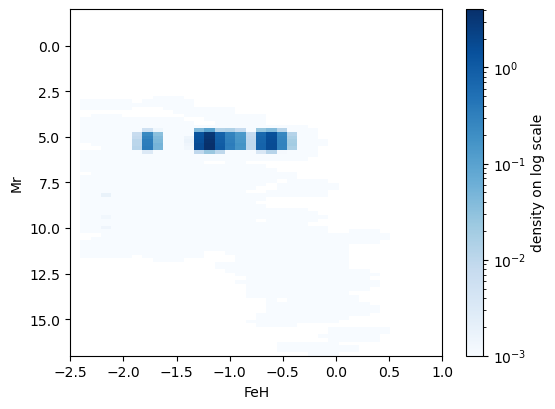

tS <class 'pandas.core.frame.DataFrame'>
r= 24.5 to 25.5 N= 1355720 Ns= 260677
subsampled for 2D map to n= 200000


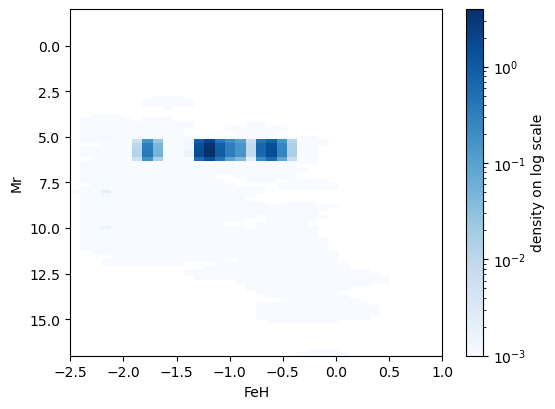

tS <class 'pandas.core.frame.DataFrame'>
r= 25.0 to 26.0 N= 1355720 Ns= 279724
subsampled for 2D map to n= 200000


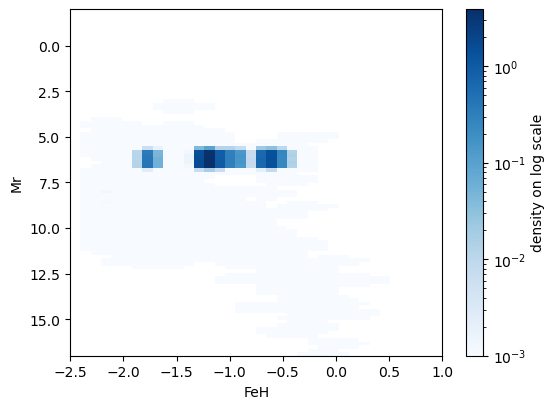

tS <class 'pandas.core.frame.DataFrame'>
r= 25.5 to 26.5 N= 1355720 Ns= 297504
subsampled for 2D map to n= 200000


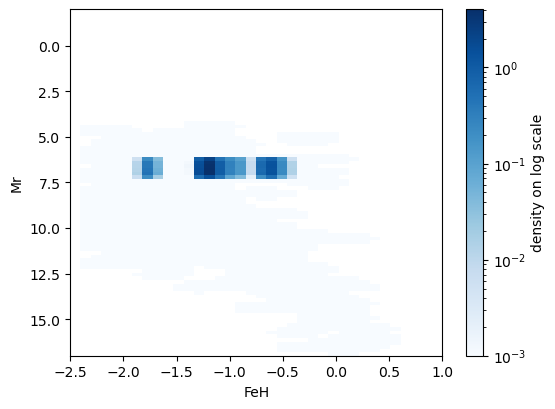

tS <class 'pandas.core.frame.DataFrame'>
r= 26.0 to 27.0 N= 1355720 Ns= 313085
subsampled for 2D map to n= 200000


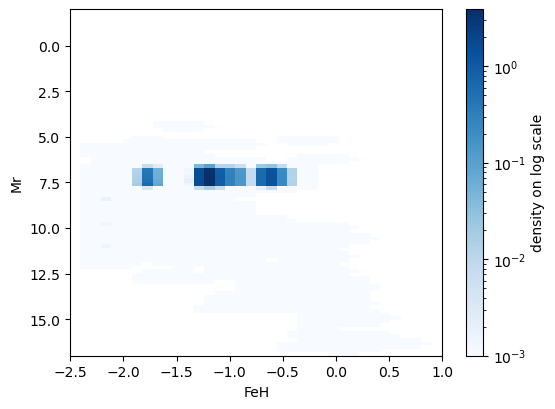

tS <class 'pandas.core.frame.DataFrame'>
r= 26.5 to 27.5 N= 1355720 Ns= 348005
subsampled for 2D map to n= 200000


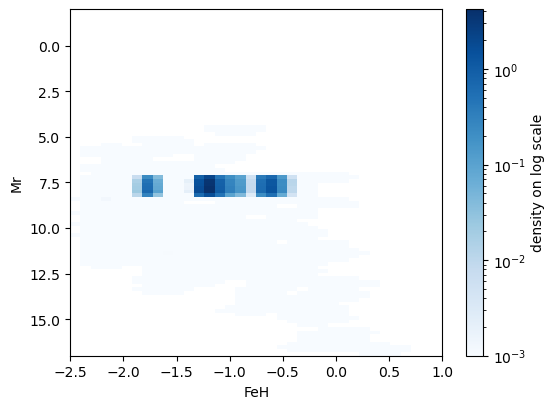

In [8]:
# rootname = 'healPix1_priors'   # here healPix1 denotes Dani's three_pix_triout.dat file
# rootname = '/mnt/beegfs/scratch/lovro/temp/three_pix_triout.dat'
rootname = '/mnt/beegfs/scratch/lovro/temp/hipscat_dump_one_healpix_o8_h532725_rootname.csv'
# NB map parameters are set in dumpPriorMaps(), by calling getBayesConstants()
bt.dumpPriorMaps_testing(trilegal, rootname, show2Dmap=True)

In [60]:
# test by reading back
bc = bt.getBayesConstants()
rmagMin = bc['rmagMin']
rmagMax = bc['rmagMax'] 
rmagNsteps = bc['rmagNsteps']  
priors, rmagBinWidth = bt.readPrior(rmagMin, rmagMax, rmagNsteps,rootname)

In [61]:
rmagBinWidth

0.5

In [62]:
priors[0]['metadata'][0], priors[0]['metadata'][1], priors[0]['metadata'][2]

(-2.5, 1.0, 36.0)

map for rObs = 19 map index = 10


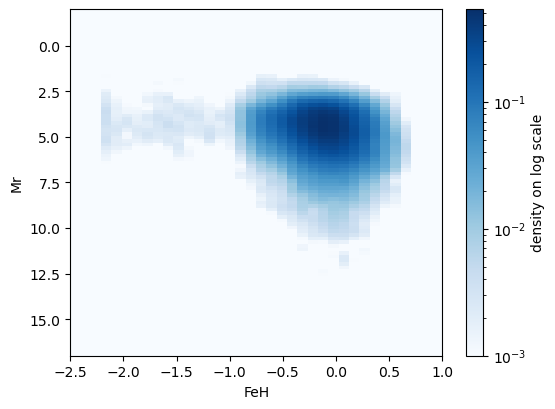

In [63]:
# plot one map
rObs = 19
mapIndex = bt.getPriorMapIndex(rObs) 
print('map for rObs =', rObs, 'map index =', mapIndex)
pt.restore2Dmap(priors[mapIndex], logScale=True)

map for rObs = 25 map index = 22


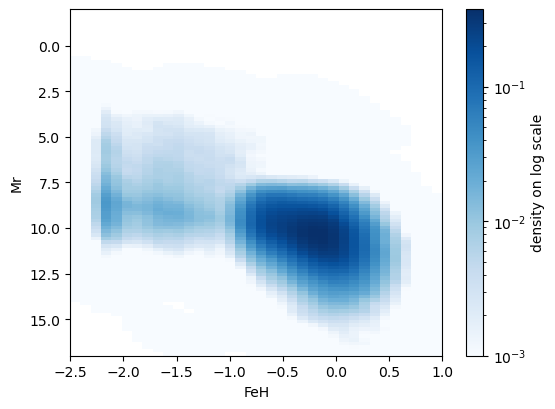

In [64]:
# plot one map
rObs = 25
mapIndex = bt.getPriorMapIndex(rObs) 
print('map for rObs =', rObs, 'map index =', mapIndex)
pt.restore2Dmap(priors[mapIndex], logScale=True)